Importação de módulos

In [41]:
import pandas as pd 
import numpy as np
import time
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Importação dos dados

In [42]:
dados = pd.read_csv("https://raw.githubusercontent.com/renatojmf/CM1-Software-Detection-Prediciton/main/data.csv", encoding = "ISO-8859-1")

Verificação dos dados

In [43]:
dados.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

In [44]:
dados.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


# Com os dados em mãos, vamos à análise dos modelos da base de dados CM1

## KNN sem peso

Começando com a separação dos dados dos conjuntos de treinamentos e de testes, para isso utilizei a biblioteca train_test_split do sklearn e o uso do KNN com distância euclidiana sem peso

In [45]:
X = dados[['loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','locCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']]
y = dados['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

model = KNeighborsClassifier(n_neighbors=5)             
model.fit(X_train, y_train) 

print("cv_score:")
print(cross_val_score(model, X, y, cv=10,scoring='accuracy'))

cv_score:
[0.82       0.88       0.88       0.88       0.84       0.9
 0.9        0.88       0.91836735 0.89795918]


Agora que possuímos uma noção dos valores apresentados no nosso treinamento, vamos variar o valor de K de modo que possamos encontrar um dos melhores valores possíveis o nosso modelo

In [54]:
k_range = [1,2,3,5,7,9,11,13,15]
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

print("cv-score:")    
print(k_scores)

cv-score:
[0.8554693877551021, 0.8835918367346938, 0.8555918367346939, 0.8796326530612244, 0.8976326530612246, 0.9016326530612245, 0.9016326530612245, 0.9016326530612245, 0.9016326530612245]


Text(0, 0.5, 'Cross-Validated Accuracy')

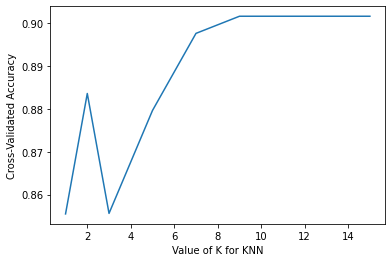

In [47]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Como podemos perceber, uma vez que utilizamos a média dos resultados gerados pelo cross-validation com cv = 10, a partir K = 9 em diante o modelo não apresenta mais algum sinal de melhora, portanto podemos assumir que o melhor valor de K para o modelo abordado é K = 9 com acurácia média de aproximadamente 90%

## KNN com pesos

Uma vez que criamos o modelo do knn com o knn 'puro', vamos agora utilizar o KNN com adição pesos na classificação para avaliar o quão é o nosso modelo 

In [48]:
X = dados[['loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','locCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']]
y = dados['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

model = KNeighborsClassifier(n_neighbors=5, weights='distance')             
model.fit(X_train, y_train) 

print("cv_score:")
print(cross_val_score(model, X, y, cv=10,scoring='accuracy'))

cv_score:
[0.8        0.96       0.88       0.9        0.88       0.88
 0.84       0.9        0.93877551 0.89795918]


In [49]:
k_range = [1,2,3,5,7,9,11,13,15]
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
  scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

print("cv-score:")    
print(k_scores)

cv-score:
[0.8554693877551021, 0.8554693877551021, 0.8675510204081632, 0.887673469387755, 0.883673469387755, 0.891673469387755, 0.891673469387755, 0.893673469387755, 0.893673469387755]


Text(0, 0.5, 'Cross-Validated Accuracy')

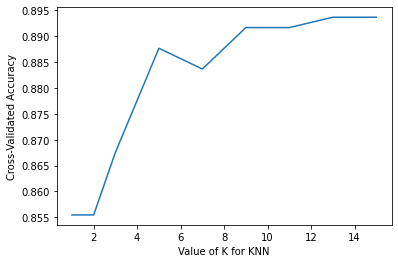

In [50]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Como podemos perceber, uma vez que utilizamos a média dos resultados gerados pelo cross-validation com cv = 10, a partir K = 13 em diante o modelo não apresenta mais algum sinal de melhora, portanto podemos assumir que o melhor valor de K para o modelo abordado é K = 13 com acurácia média de aproximadamente 89,3%

## KNN Adaptativo

In [65]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV

parameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}

X = dados[['loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','locCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']]
y = dados['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

#classifier = GridSearchCV(MLkNN(), parameters)
#classifier.fit(X_train, y_train)

#print("cv_score:")
#print(cross_val_score(classifier, X, y, cv=10,scoring='accuracy'))
#print('best parameters :', classifier.best_params_, 'best score: ',clf.best_score_)

# Vamos à análise dos modelos da base de dados KC1

In [66]:
kc1Data = pd.read_csv("https://raw.githubusercontent.com/renatojmf/CM1-Software-Detection-Prediciton/main/kc1Data.csv", encoding = "ISO-8859-1")

In [67]:
kc1Data.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

In [68]:
kc1Data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,0.31,1187.70,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,0.26,635.37,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,0.08,132.33,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True


## knn sem pesos

In [69]:
X = kc1Data[['loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','locCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']]
y = kc1Data['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

model = KNeighborsClassifier(n_neighbors=5)             
model.fit(X_train, y_train) 

print("cv_score:")
print(cross_val_score(model, X, y, cv=10,scoring='accuracy'))

cv_score:
[0.82938389 0.80094787 0.81042654 0.80094787 0.79620853 0.78199052
 0.81990521 0.82464455 0.81516588 0.87619048]


In [70]:
k_range = [1,2,3,5,7,9,11,13,15]
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

print("cv-score:")    
print(k_scores)

cv-score:
[0.7824035206499662, 0.8203159557661927, 0.8075174904084857, 0.8155811329271044, 0.821749040848567, 0.8293342360640938, 0.8369171744527195, 0.8392800722184608, 0.8373843376213046]


Text(0, 0.5, 'Cross-Validated Accuracy')

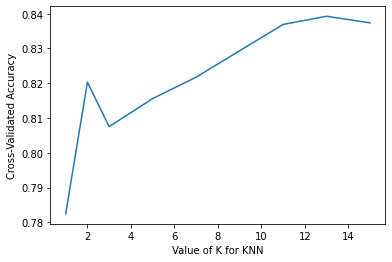

In [71]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Como podemos perceber, uma vez que utilizamos a média dos resultados gerados pelo cross-validation com cv = 10, a partir K = 13 em diante o modelo não apresenta mais algum sinal de melhora, portanto podemos assumir que o melhor valor de K para o modelo abordado é K = 13 com acurácia média de aproximadamente 84%

## knn com pesos

In [72]:
X = kc1Data[['loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','locCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']]
y = kc1Data['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

model = KNeighborsClassifier(n_neighbors=5, weights='distance')             
model.fit(X_train, y_train) 

print("cv_score:")
print(cross_val_score(model, X, y, cv=10,scoring='accuracy'))

cv_score:
[0.82938389 0.77251185 0.83412322 0.81042654 0.7535545  0.78199052
 0.78672986 0.81990521 0.83412322 0.88571429]


In [73]:
k_range = [1,2,3,5,7,9,11,13,15]
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
  scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

print("cv-score:")    
print(k_scores)

cv-score:
[0.7824035206499662, 0.7861949898442789, 0.8056262694651322, 0.8108463100880161, 0.8113202437373055, 0.8170097043556759, 0.8269600541638458, 0.8245903859174002, 0.8293297224102911]


Text(0, 0.5, 'Cross-Validated Accuracy')

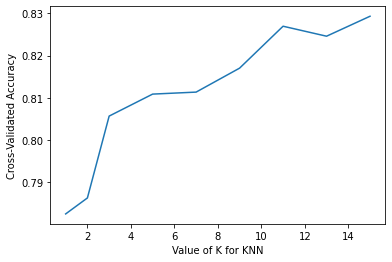

In [74]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Como podemos perceber, uma vez que utilizamos a média dos resultados gerados pelo cross-validation com cv = 10, a partir K = 13 em diante o modelo não apresenta mais algum sinal de melhora, portanto podemos assumir que o melhor valor de K para o modelo abordado é K = 13 com acurácia média de aproximadamente 83%